Question 1 

A

In [79]:
import pandas as pd

# Load the dataset from the specified file path
file_path = 'FIFA_Worldcup_2022.csv'
worldcup_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(worldcup_data.head())

# Print all column names to understand the features available
print(worldcup_data.columns)

# Extract and print unique team names to ensure no repetition
unique_teams = worldcup_data['Team'].unique()
print(unique_teams)

   Sl. No  Match No.     Team      Against Group  Goal  Possession (%)  \
0       1          1    Qatar      Ecuador     A     0              40   
1       2          1  Ecuador        Qatar     A     2              46   
2       3          2  England         Iran     B     6              69   
3       4          2     Iran      England     B     2              20   
4       5          3  Senegal  Netherlands     A     0              39   

   Inside Penalty Area  Outside Penalty Area  Assists  ...  Fouls Against  \
0                    0                     0        0  ...             15   
1                    2                     0        1  ...             15   
2                    6                     0        6  ...              9   
3                    2                     0        1  ...             14   
4                    0                     0        0  ...             13   

   Offsides  Passes  Passes Completed  Crosses  Crosses Completed  Corners  \
0         3   

B

In [80]:
#Creating a new DataFrame called 'group_matches' and extracting the 96 rows 
group_matches = worldcup_data.iloc[0:96] 

#printing the first few rows to verify the DataFrame which just set
print("First few rows of the Group Stage matches:")
print(group_matches.head())

#getting the output of the last few rows to verify the DataFrame
print("\nLast few rows of the Group Stage matches:")
print(group_matches.tail())

First few rows of the Group Stage matches:
   Sl. No  Match No.     Team      Against Group  Goal  Possession (%)  \
0       1          1    Qatar      Ecuador     A     0              40   
1       2          1  Ecuador        Qatar     A     2              46   
2       3          2  England         Iran     B     6              69   
3       4          2     Iran      England     B     2              20   
4       5          3  Senegal  Netherlands     A     0              39   

   Inside Penalty Area  Outside Penalty Area  Assists  ...  Fouls Against  \
0                    0                     0        0  ...             15   
1                    2                     0        1  ...             15   
2                    6                     0        6  ...              9   
3                    2                     0        1  ...             14   
4                    0                     0        0  ...             13   

   Offsides  Passes  Passes Completed  Crosses  C

C

In [81]:
#creating limited data frame by selecting specific columns
group_matches_limited = group_matches[['Match No.', 'Team', 'Against', 'Group', 'Goal', 'Pts']]

print("First few rows of the limited Group Stage matches:")
print(group_matches_limited.head())

First few rows of the limited Group Stage matches:
   Match No.     Team      Against Group  Goal  Pts
0          1    Qatar      Ecuador     A     0    0
1          1  Ecuador        Qatar     A     2    3
2          2  England         Iran     B     6    3
3          2     Iran      England     B     2    0
4          3  Senegal  Netherlands     A     0    0


D

In [82]:
group_matches_limited_dict = dict(zip(group_matches_limited['Team'], group_matches_limited['Group']))

print("Dictionary of Teams and their Groups:")
print(group_matches_limited_dict)

Dictionary of Teams and their Groups:
{'Qatar': 'A', 'Ecuador': 'A', 'England': 'B', 'Iran': 'B', 'Senegal': 'A', 'Netherlands': 'A', 'United States': 'B', 'Wales': 'B', 'Argentina': 'C', 'Saudi Arabia': 'C', 'Denmark': 'D', 'Tunisia': 'D', 'Mexico': 'C', 'Poland': 'C', 'France': 'D', 'Australia': 'D', 'Morocco': 'F', 'Croatia': 'F', 'Germany': 'E', 'Japan': 'E', 'Spain': 'E', 'Costa Rica': 'E', 'Belgium': 'F', 'Canada': 'F', 'Switzerland': 'G', 'Cameroon': 'G', 'Uruguay': 'H', 'Korea Republic': 'H', 'Portugal': 'H', 'Ghana': 'H', 'Brazil': 'G', 'Serbia': 'G'}


E

In [83]:
def get_group_teams(team_name):
    """
    Function to get all teams in the same group as the given team.
    
    Args:
    team_name (str): Name of the team to find the group members for.
    
    Returns:
    list: List of teams in the same group as the given team.
    """
    # Retrieve the group of the input team from the dictionary
    group = group_matches_limited_dict[team_name]
    
    # Create a list to hold teams that are in the same group as the input team
    same_group_teams = [team for team, grp in group_matches_limited_dict.items() if grp == group]
    
    return same_group_teams

team_list = get_group_teams('England')
print(team_list)

['England', 'Iran', 'United States', 'Wales']


F

In [84]:
def get_group_rows(team_name):
    """
    Retrieves all matches from the DataFrame that involve teams in the same group as the specified team.
    
    Args:
    team_name (str): The name of the team whose group matches are to be retrieved.
    
    Returns:
    DataFrame: A DataFrame containing all matches of teams in the same group.
    """
  
    team_group = group_matches_limited_dict[team_name]
    
    #filtering the dataframe to get rows which 'Group' column matches the team group
    group_rows = group_matches_limited[group_matches_limited['Group'] == team_group]
    
    return group_rows

england_group_matches = get_group_rows('England')
print(england_group_matches)

    Match No.           Team        Against Group  Goal  Pts
2           2        England           Iran     B     6    3
3           2           Iran        England     B     2    0
6           4  United States          Wales     B     1    1
7           4          Wales  United States     B     1    1
32         17          Wales           Iran     B     0    1
33         17           Iran          Wales     B     2    3
38         20        England  United States     B     0    1
39         20  United States        England     B     0    1
68         35          Wales        England     B     0    0
69         35        England          Wales     B     3    3
70         36           Iran  United States     B     0    0
71         36  United States           Iran     B     1    3


G

In [85]:
def get_team_stats(team_name):
    """
    Retrieves statistics for the specified team including total points, goals scored, and goals conceded.
    
    Args:
    team_name (str): The name of the team to retrieve stats for.
    
    Returns:
    dict: A dictionary containing the team's points, goals scored, and goals conceded.
    """
 
    team_matches = group_matches_limited[(group_matches_limited['Team'] == team_name) | 
                                         (group_matches_limited['Against'] == team_name)]
    
    #calculating the sum of points and goals
    total_points = team_matches.loc[team_matches['Team'] == team_name, 'Pts'].sum()
    goals_scored = team_matches.loc[team_matches['Team'] == team_name, 'Goal'].sum()
    goals_conceded = team_matches.loc[team_matches['Against'] == team_name, 'Goal'].sum()
    
    #returning the stats of a dictionary
    stats = {
        'Points': total_points,
        'Goals Scored': goals_scored,
        'Goals Conceded': goals_conceded
    }
    
    return stats

team_stats = get_team_stats('England')
print(team_stats)

{'Points': 7, 'Goals Scored': 9, 'Goals Conceded': 2}


H

In [86]:
def get_group_table(team_name):
    """
    Generates a table of team statistics for all teams in the same group as the specified team.
    
    Args:
    team_name (str): Name of the team to find the group statistics for.
    
    Returns:
    DataFrame: A DataFrame with rows for each team in the group and columns for Points, Goals Scored,
               Goals Conceded, and Goal Difference, sorted by Points, Goal Difference, and Goals Scored.
    """

    team_group = group_matches_limited_dict[team_name]
    
    
    group_data = group_matches_limited[group_matches_limited['Group'] == team_group]
    
    #to get teams in a group
    teams_in_group = group_data['Team'].unique()
    
    #starting a new dataframe to store the results
    results = pd.DataFrame(columns=['Points', 'Goals Scored', 'Goals Conceded', 'Goal Difference'])
    
    #Calculate statistics for each team
    for team in teams_in_group:
        team_points = group_data.loc[group_data['Team'] == team, 'Pts'].sum()
        goals_scored = group_data.loc[group_data['Team'] == team, 'Goal'].sum()
        goals_conceded = group_data.loc[group_data['Against'] == team, 'Goal'].sum()
        goal_diff = goals_scored - goals_conceded
        
        #appending results to the DataFrame
        results.loc[team] = [team_points, goals_scored, goals_conceded, goal_diff]
  
    results.sort_values(by=['Points', 'Goal Difference', 'Goals Scored'], ascending=[False, False, False], inplace=True)
    
    return results

print(get_group_table('England'))
print(get_group_table('Portugal'))

               Points  Goals Scored  Goals Conceded  Goal Difference
England             7             9               2                7
United States       5             2               1                1
Iran                3             4               7               -3
Wales               2             1               6               -5
                Points  Goals Scored  Goals Conceded  Goal Difference
Portugal             6             6               4                2
Korea Republic       4             4               4                0
Uruguay              4             2               2                0
Ghana                3             5               7               -2


I

In [87]:
def get_all_group_tables():
    """
    Generates a comprehensive table for all groups in the tournament, summarizing each team's performance metrics.
    
    Returns:
    DataFrame: A DataFrame with a multi-index (Group, Team) and columns for Points, Goals Scored, Goals Conceded,
               and Goal Difference for each team in each group.
    """
 
    groups = group_matches_limited['Group'].unique()
    
    group_tables = []
    
    #generating a table by groups
    for group in groups:
       
        team = group_matches_limited[group_matches_limited['Group'] == group]['Team'].iloc[0]
        group_table = get_group_table(team)
        
        #using MultiIndex to differentiate the group
        group_table.index = pd.MultiIndex.from_product([[group], group_table.index], names=['Group', 'Team'])
        
        #Appending the group table to the list
        group_tables.append(group_table)

    all_groups_table = pd.concat(group_tables)
    
    return all_groups_table

print(get_all_group_tables())

                      Points  Goals Scored  Goals Conceded  Goal Difference
Group Team                                                                 
A     Netherlands          7             5               1                4
      Senegal              6             5               4                1
      Ecuador              4             4               3                1
      Qatar                0             1               7               -6
B     England              7             9               2                7
      United States        5             2               1                1
      Iran                 3             4               7               -3
      Wales                2             1               6               -5
C     Argentina            6             5               2                3
      Poland               4             2               2                0
      Mexico               4             2               3               -1
      Saudi 

J

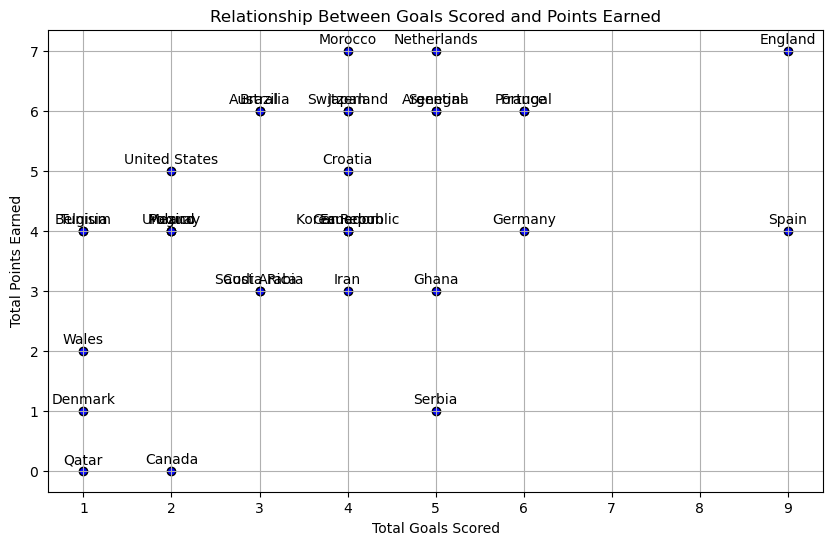

In [68]:
#aggregate goals and points for each team
team_performance = group_matches_limited.groupby('Team').agg({
    'Goal': 'sum',  # Total goals scored by the team
    'Pts': 'sum'    # Total points earned by the team
}).reset_index()

#create a scatter plot to visualize the relationship between goals scored and points earned
plt.figure(figsize=(10, 6))
plt.scatter(team_performance['Goal'], team_performance['Pts'], color='blue', edgecolor='black')

#adding labels and title to clarify
plt.title('Relationship Between Goals Scored and Points Earned')
plt.xlabel('Total Goals Scored')
plt.ylabel('Total Points Earned')

#annotate each point with the team name
for i, row in team_performance.iterrows():
    plt.annotate(row['Team'], (row['Goal'], row['Pts']), textcoords="offset points", xytext=(0,5), ha='center')

plt.grid(True)
plt.show()

- The plot shows a positive correlation between the number of goals scored and the points accumulated, suggesting that teams which scored more goals generally ended up with more points.
- Teams with a higher goal tally not only advanced through the stages but also secured top positions within their groups.

Question 2 

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("insurance_project.csv")

In [70]:
print(df.head())
print(df.info())

   age     sex     bmi  children smoker     region      charges  year
0   19  female  27.900         0    yes  southwest  16884.92400  2017
1   18    male  33.770         1     no  southeast   1725.55230  2011
2   28    male  33.000         3     no  southeast   4449.46200  2013
3   33    male  22.705         0     no  northwest  21984.47061  2019
4   32    male  28.880         0     no  northwest   3866.85520  2013
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   year      1338 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB
None


In [71]:
#cleaning the data
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
year        0
dtype: int64


<Figure size 1000x600 with 0 Axes>

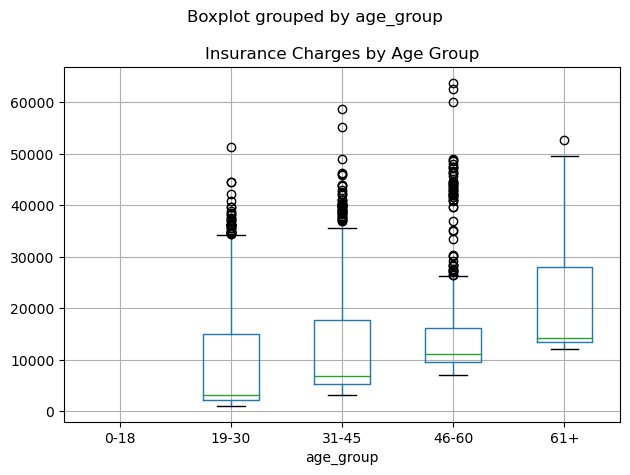

<Figure size 1000x600 with 0 Axes>

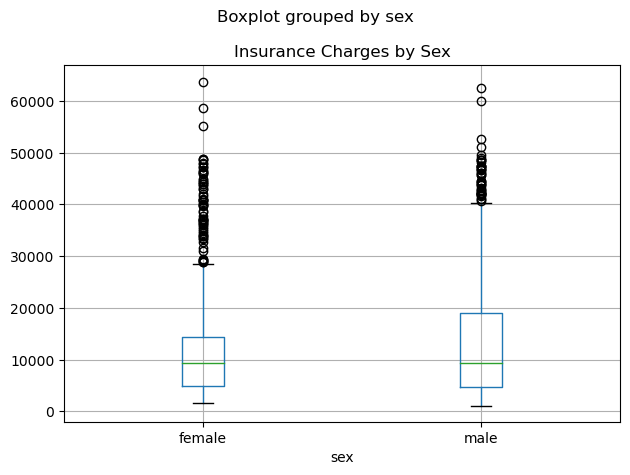

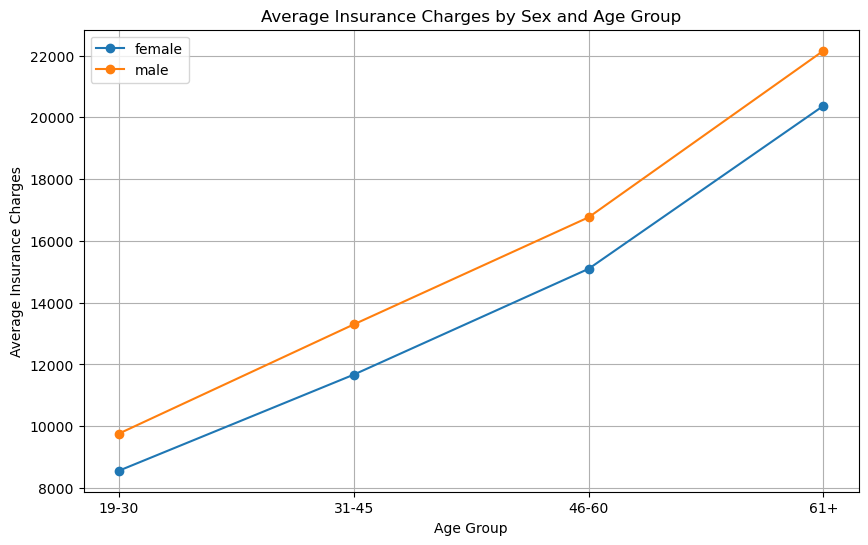

In [73]:
#define age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#average insurance charges by sex and age group
avg_charges = df.groupby(['sex', 'age_group'])['charges'].mean().reset_index()

#the first figure for 'Insurance Charges by Age Group'
plt.figure(figsize=(10, 6))
df.boxplot(column='charges', by='age_group')
plt.title('Insurance Charges by Age Group')
plt.tight_layout()
plt.show()

#the second figure for 'Insurance Charges by Sex'
plt.figure(figsize=(10, 6))
df.boxplot(column='charges', by='sex')
plt.title('Insurance Charges by Sex')
plt.tight_layout()
plt.show()

#the third figure for 'Average Insurance Charges by Sex and Age Group'
plt.figure(figsize=(10, 6))
for sex in avg_charges['sex'].unique():
    sex_data = avg_charges[avg_charges['sex'] == sex]
    plt.plot(sex_data['age_group'], sex_data['charges'], marker='o', label=sex)
plt.xlabel('Age Group')
plt.ylabel('Average Insurance Charges')
plt.title('Average Insurance Charges by Sex and Age Group')
plt.legend()
plt.grid(True)
plt.show()

Boxplot Analysis by Sex
- The boxplot comparing insurance charges by sex shows that males generally have higher median charges than females. This might indicate that males are either opting for or being charged for more comprehensive health coverage, or it may reflect differences in health risks or utilization rates between genders.

Boxplot Analysis by Age Group
- Insurance charges increase with age, as depicted in the boxplots grouped by age categories. This trend reflects the increasing healthcare needs and risks associated with aging. The spread and outliers increase in older age groups, indicating more variability in health status and thus in the insurance charges among older adults.

Line Graph of Average Insurance Charges
- The line graph further delineates the relationship between age, sex, and insurance charges. It highlights a consistent increase in charges with age for both sexes. Interestingly, the gap in charges between males and females appears to widen with age, possibly due to differing health issues that emerge and evolve differently across genders over time.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1338 non-null   int64   
 1   sex        1338 non-null   object  
 2   bmi        1338 non-null   float64 
 3   children   1338 non-null   int64   
 4   smoker     1338 non-null   object  
 5   region     1338 non-null   object  
 6   charges    1338 non-null   float64 
 7   year       1338 non-null   int64   
 8   age_group  1338 non-null   category
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 85.3+ KB
None


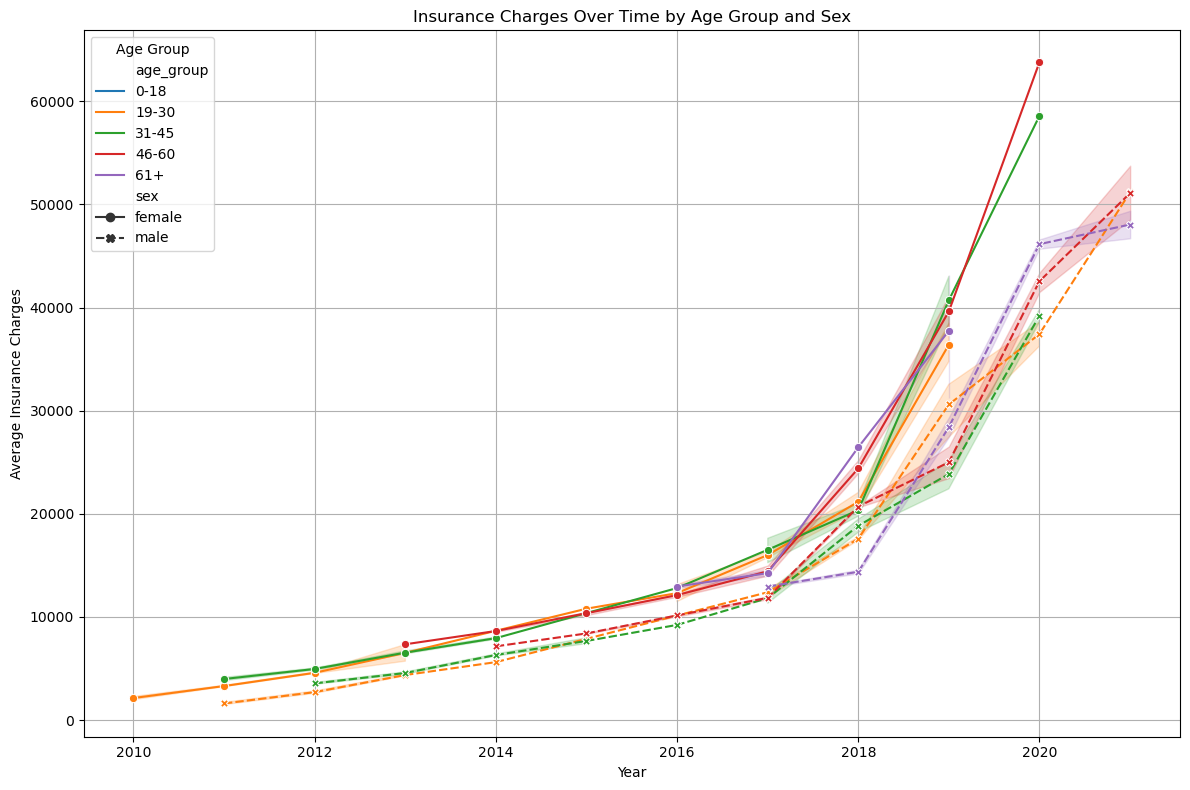

In [74]:
import seaborn as sns
# Explore the dataset structure and data types
print(df.info())

#convert the year column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

#group the data by relevant demographics and calculate average insurance charges over time
grouped_data = df.groupby(['age_group', 'sex', 'region', 'year'])['charges'].mean().reset_index()

#plotting the trends of insurance charges over time for different demographics
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='year', y='charges', hue='age_group', style='sex', markers=True)
plt.title('Insurance Charges Over Time by Age Group and Sex')
plt.xlabel('Year')
plt.ylabel('Average Insurance Charges')
plt.legend(title='Age Group', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

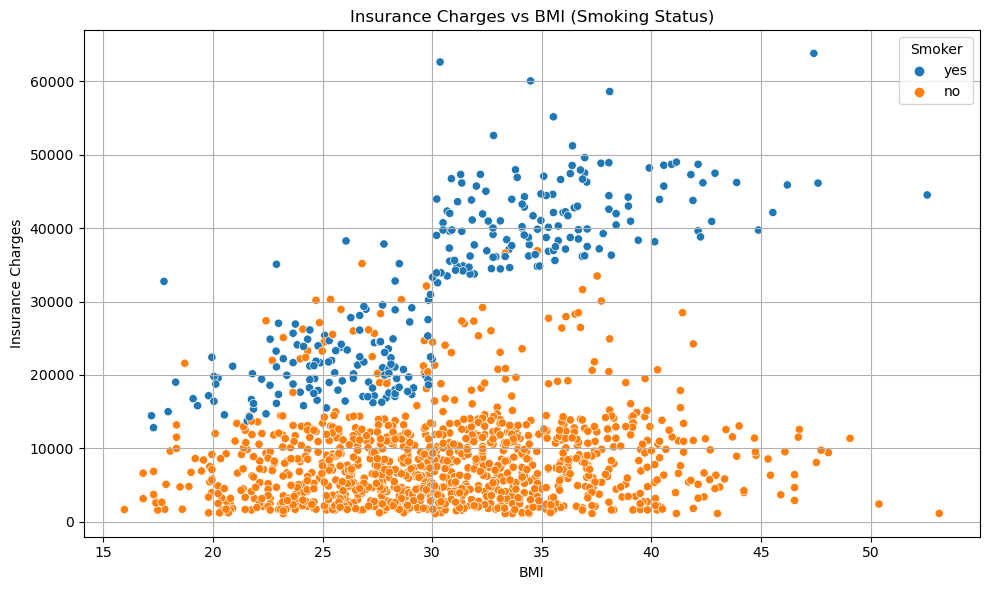

Correlation between insurance charges and BMI: 0.19834096883362887
Correlation between insurance charges and smoking status: 0.7872514304984778


In [75]:
import matplotlib.pyplot as plt
#correlation between insurance charges and BMI
bmi_corr = df['charges'].corr(df['bmi'])

#correlation between insurance charges and smoking status
smoker_corr = df['charges'].corr(df['smoker'].map({'yes': 1, 'no': 0}))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('Insurance Charges vs BMI (Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend(title='Smoker', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Correlation between insurance charges and BMI: {bmi_corr}")
print(f"Correlation between insurance charges and smoking status: {smoker_corr}")

Insurance and Smoking
- The correlation coefficient between insurance charges and whether someone smokes is approximately 0.79, indicating a strong positive correlation. This means that smokers tend to have substantially higher insurance charges compared to non-smokers.

Insurance and BMI
- The correlation between BMI and insurance charges is relatively lower (0.20), indicating a weaker positive relationship. This suggests that while BMI is a factor in determining insurance charges, its impact is less pronounced compared to smoking status.

Problem 3

In this problem, I'll do the job charactersitic analysis by analyzing the required skills and qualifications listed in job postings to spot trends in skill demands across different sectors as a exploratory data analysis. I'm using the provided dataset to investigate the variety of job titles and the frequency of each title to identify the most in-demand roles. This will help understand what employers are currently looking for in potential candidates.

In [97]:
import pandas as pd
from collections import Counter
import re

data = pd.read_csv('linkedin-jobs-search-scrape.csv')

#list of the skills 
skills_list = ['Python', 'R', 'SQL', 'Machine Learning', 'Deep Learning', 'TensorFlow', 'PyTorch', 'NLP', 'Tableau', 'Excel', 'PowerBI']

#a fucntion to search for skills 
def extract_skills(description):
    found_skills = []
    for skill in skills_list:
        if re.search(r'\b' + re.escape(skill) + r'\b', description, re.IGNORECASE):
            found_skills.append(skill)
    return found_skills

#applying the fucntion to job description and summing up the skills
data['extracted_skills'] = data['descriptionText'].apply(extract_skills)
all_skills = sum(data['extracted_skills'], []) 
skills_frequency = Counter(all_skills)

#convert the counter to a DataFrame for better visualization
skills_df = pd.DataFrame(skills_frequency.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

print(skills_df.head(10))

              Skill  Frequency
0            Python        379
2  Machine Learning        354
7               SQL        195
1                 R        140
3        TensorFlow         76
5               NLP         72
6     Deep Learning         68
4           PyTorch         65
8           Tableau         43
9             Excel         29


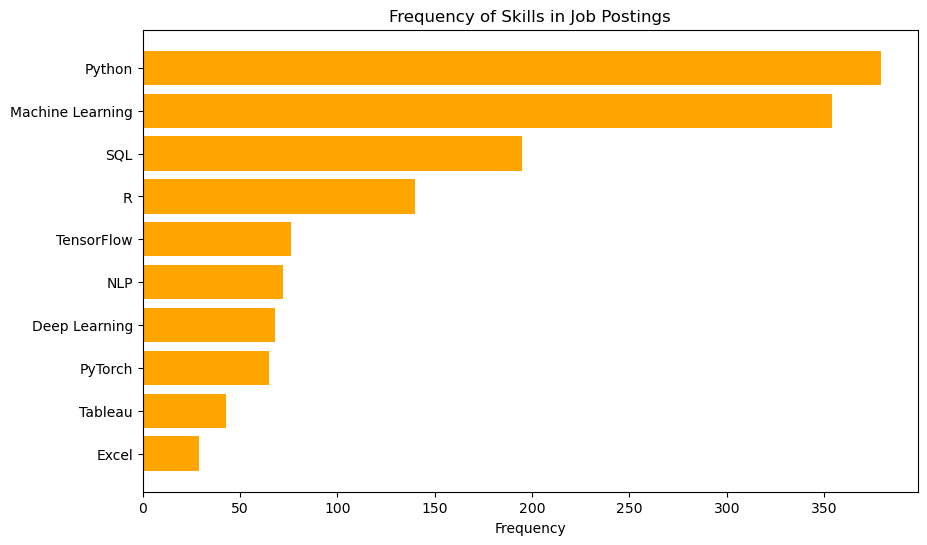

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(skills, frequencies, color='orange')
plt.xlabel('Frequency')
plt.title('Frequency of Skills in Job Postings')
plt.gca().invert_yaxis() 
plt.show()

I visualized this bar chart to show the frequency of various skills in job postings. The chart clearly shows that Python and Machine Learning are the most frequently mentioned skills, which aligns with their critical role in data science and analytics sectors. SQL and R also show substantial demand, essential for data management and statistical analysis.

As the observations:
- Python stands out as the most essential skill, possibly due to its versatility and broad usage in data manipulation, machine learning, and web development contexts.
- Machine Learning skills are almost as in demand as Python, reflecting the growing interest in AI technologies across various industries.
- Lower frequency skills like Tableau and Excel highlight the ongoing need for data visualization and spreadsheet management, though they are less emphasized than programming and machine learning skills

                        Skill Pair  Frequency
1       (Machine Learning, Python)        281
19                   (SQL, Python)        164
9                      (Python, R)        124
20         (Machine Learning, SQL)        118
2            (Machine Learning, R)         87
27                        (SQL, R)         73
4   (Machine Learning, TensorFlow)         71
11            (Python, TensorFlow)         65
3          (Machine Learning, NLP)         64
0      (Machine Learning, PyTorch)         60


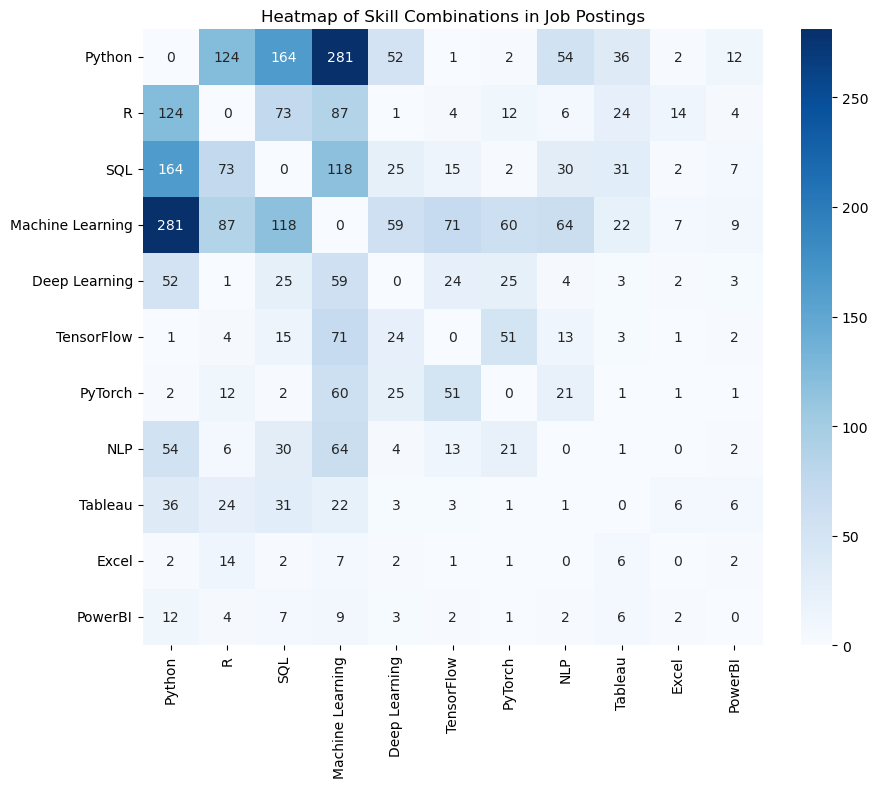

In [102]:
import re
from itertools import combinations
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#writing a function to find skill pairs
def extract_skill_pairs(description):
    found_skills = []
    for skill in skills_list:
        if re.search(r'\b' + re.escape(skill) + r'\b', description, re.IGNORECASE):
            found_skills.append(skill)
    skill_pairs = list(combinations(set(found_skills), 2))
    return skill_pairs

#applying function for each skill pairs
data['skill_pairs'] = data['descriptionText'].apply(extract_skill_pairs)
all_skill_pairs = sum(data['skill_pairs'], [])  # Flatten the list of lists
pair_frequency = Counter(all_skill_pairs)

#data frame for the pairs 
pairs_df = pd.DataFrame(pair_frequency.items(), columns=['Skill Pair', 'Frequency']).sort_values(by='Frequency', ascending=False)

#getting out most common skill parts 
print(pairs_df.head(10))

#create a matrix for the heatmap
skill_matrix = pd.DataFrame(0, index=skills_list, columns=skills_list)
for pair, freq in pair_frequency.items():
    skill_matrix.loc[pair[0], pair[1]] = freq
    skill_matrix.loc[pair[1], pair[0]] = freq

plt.figure(figsize=(10, 8))
sns.heatmap(skill_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Skill Combinations in Job Postings')
plt.show()

The heatmap is displaying the combinations of skills as they appear together in job postings. This visualization helps to see the relationships between skills more clearly and identify which ones are most frequently linked.

From the heatmap, insights can be count as follows, 
- Python and Machine Learning is the most prominent pairing, emphasizing the crucial role of Python in machine learning projects.
- Python and SQL is count as another significant combination, illustrating the importance of data manipulation and database skills alongside programming.
- After all that, TensorFlow, PyTorch, and NLP are also showing meaningful associations with Machine Learning, indicating specialized roles that demand specific frameworks or skills in natural language processing.

Conclusion 

Things I learnt in the process : 
The process revealed the intricate ways in which different skills interact within job postings. Analyzing skill combinations required thoughtful consideration of how these skills complement each other in real-world settings. Creating visual representations, such as heatmaps, was crucial in understanding and communicating the relationships between skills effectively. This emphasized the importance of data visualization in data science. The analysis underscored the evolving nature of job requirements in the tech industry, where new tools and technologies continually reshape skill demands.

Results Vs Expectation : 
The prominence of Python and Machine Learning in job postings was anticipated, reflecting industry trends. However, the extent of their dominance, especially their combination, was even more pronounced than expected. The significant role of specialized skills like TensorFlow and PyTorch in conjunction with machine learning was somewhat expected but highlighted the rapid pace at which specializations are becoming crucial in the field.

Key Findings : 
Python and Machine Learning are essential for anyone looking to enter data-driven fields, with SQL not far behind. These skills form the backbone of most data science roles.The analysis highlighted how certain skills are often required together, suggesting that job seekers should focus on acquiring complementary skill sets to improve their marketability. While broad programming and analytical skills remain crucial, specialization in areas like deep learning and natural language processing is increasingly important.

According to the findings from this process, as a job seekers or student should focus on acquiring and refining a mix of programming, machine learning, and data management skills. Understanding and gaining proficiency in Python, SQL, and Machine Learning should be a priority.

This exploratory data analysis has provided valuable insights into the skills most in demand within the tech job market, reflecting both ongoing trends and emerging needs. It's clear that a combination of broad technical skills and specialized knowledge will be key to career advancement in this rapidly evolving landscape.